In [1]:
import sys
sys.path.append("..")

from src.data.datasets.melody_dataset import MelodyDataset
from src.data.loaders.melody_loader import get_dataloader
from src.data.structures.sample import Sample

In [2]:
train_dataset = MelodyDataset.from_path("..\\datasets\\melody_extraction\\processed\\train")

Preprocessing data: 100%|██████████| 1233/1233 [00:04<00:00, 280.61it/s]


In [3]:
print(len(train_dataset.sliced_audio))
print(len(train_dataset.sliced_melody))

1233
1233


array([<Axes: xlabel='Время, с', ylabel='Частота, Гц'>,
       <Axes: xlabel='Время, с'>], dtype=object)

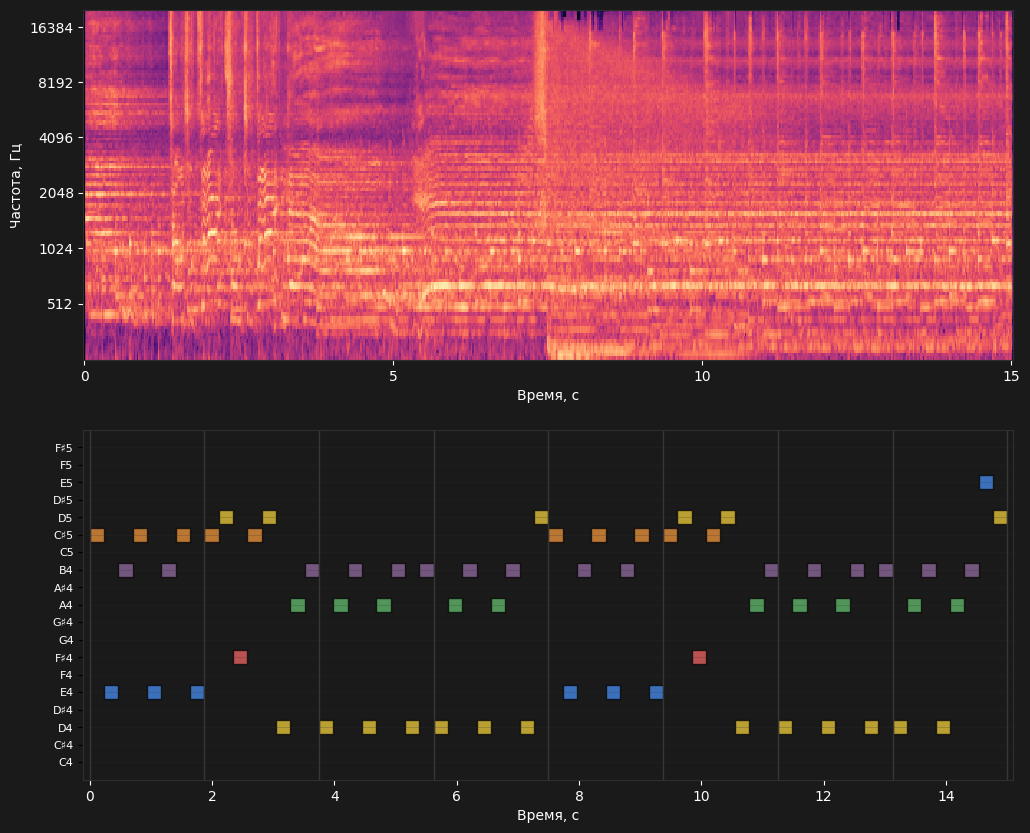

In [6]:
sample = Sample(train_dataset.audio[0], train_dataset.melody[0])
sample.visualize_with_spectrogram()

Длительность аудио: 7.4996825396825395
Длительность мелодии: 7.5


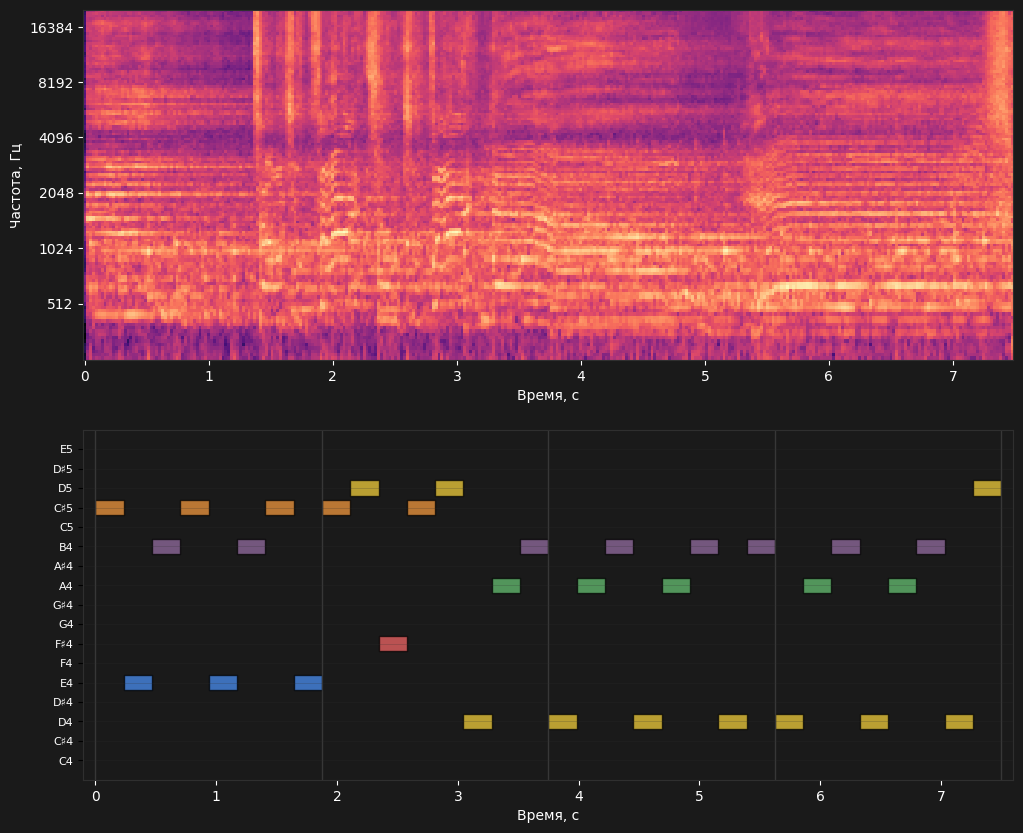

In [9]:
idx = 0
audio = train_dataset.sliced_audio[idx]
melody = train_dataset.sliced_melody[idx]

sample = Sample(audio, melody)
sample.visualize_with_spectrogram()

print(f"Длительность аудио: {audio.duration}")
print(f"Длительность мелодии: {melody.duration}")

In [3]:
train_loader = get_dataloader(train_dataset, batch_size=32, num_workers=0, shuffle=False)
data = next(iter(train_loader))

spectrograms = data[0]
freqs = data[1]
durations = data[2]
len_seqs = data[3]

In [4]:
spectrograms.shape

torch.Size([32, 1, 128, 256])

In [5]:
freqs.shape

torch.Size([32, 32])

In [6]:
durations.shape

torch.Size([32, 32])

In [7]:
len_seqs.shape

torch.Size([32, 1])

In [10]:
freqs[idx]

tensor([0.6381, 0.5857, 0.6265, 0.6381, 0.5857, 0.6265, 0.6381, 0.5857, 0.6381,
        0.6439, 0.5974, 0.6381, 0.6439, 0.5741, 0.6148, 0.6265, 0.5741, 0.6148,
        0.6265, 0.5741, 0.6148, 0.6265, 0.5741, 0.6265, 0.5741, 0.6148, 0.6265,
        0.5741, 0.6148, 0.6265, 0.5741, 0.6439])

In [29]:
durations[idx]

tensor([ 4.7619e-02,  4.7619e-02,  4.7619e-02,  1.5873e-02,  1.5873e-02,
         6.1905e-01, -1.0000e+02, -1.0000e+02, -1.0000e+02, -1.0000e+02,
        -1.0000e+02, -1.0000e+02, -1.0000e+02, -1.0000e+02, -1.0000e+02,
        -1.0000e+02, -1.0000e+02, -1.0000e+02, -1.0000e+02, -1.0000e+02,
        -1.0000e+02, -1.0000e+02, -1.0000e+02, -1.0000e+02, -1.0000e+02,
        -1.0000e+02, -1.0000e+02, -1.0000e+02, -1.0000e+02, -1.0000e+02])

In [30]:
len_seqs

tensor([[0.4444],
        [0.3968],
        [0.4603],
        [0.3651],
        [0.2698],
        [0.1746],
        [0.2540],
        [0.0794],
        [0.1905]])

In [11]:
from src.nn.models.MelodyNet import MelodyNet

model = MelodyNet()

freqs, durations, seq_len = model.forward(spectrograms)

In [12]:
freqs.shape

torch.Size([32, 64])

In [13]:
freqs

tensor([[0.4954, 0.5040, 0.5369,  ..., 0.4456, 0.5082, 0.5729],
        [0.5648, 0.4869, 0.5629,  ..., 0.4664, 0.4902, 0.5223],
        [0.5596, 0.5522, 0.5306,  ..., 0.5372, 0.4581, 0.5539],
        ...,
        [0.5214, 0.4663, 0.4881,  ..., 0.5163, 0.5223, 0.4899],
        [0.5181, 0.4555, 0.5527,  ..., 0.5071, 0.4942, 0.5372],
        [0.4977, 0.4889, 0.5507,  ..., 0.5391, 0.5268, 0.5189]],
       grad_fn=<SigmoidBackward0>)

In [34]:
durations.shape

torch.Size([9, 64])

In [35]:
durations

tensor([[0.6266, 0.4947, 0.3118, 0.4210, 0.4134, 0.4411, 0.6040, 0.6674, 0.3783,
         0.2711, 0.5593, 0.4930, 0.6379, 0.3628, 0.5516, 0.6614, 0.5749, 0.6091,
         0.4654, 0.6011, 0.6086, 0.5615, 0.5016, 0.4250, 0.5301, 0.3794, 0.4697,
         0.6702, 0.3466, 0.5295, 0.4293, 0.5898, 0.6498, 0.7521, 0.7340, 0.3449,
         0.5742, 0.2594, 0.6180, 0.5983, 0.3787, 0.4192, 0.3344, 0.3475, 0.4012,
         0.4712, 0.4995, 0.4948, 0.4604, 0.5171, 0.2843, 0.3160, 0.4713, 0.4040,
         0.5118, 0.4750, 0.7252, 0.6331, 0.3873, 0.6080, 0.4878, 0.4206, 0.3540,
         0.5524],
        [0.6144, 0.5316, 0.3529, 0.4316, 0.4131, 0.3647, 0.6018, 0.6307, 0.4558,
         0.2196, 0.5648, 0.5357, 0.6763, 0.3442, 0.5598, 0.5998, 0.5951, 0.6453,
         0.4319, 0.6211, 0.5655, 0.5915, 0.4711, 0.4629, 0.4642, 0.4109, 0.5136,
         0.6662, 0.3556, 0.5002, 0.3888, 0.5717, 0.6739, 0.6825, 0.7482, 0.2849,
         0.5820, 0.3121, 0.6423, 0.6082, 0.3229, 0.4250, 0.3211, 0.3730, 0.3592,
         0

In [36]:
len_seqs.shape

torch.Size([9, 1])

In [37]:
len_seqs

tensor([[0.4444],
        [0.3968],
        [0.4603],
        [0.3651],
        [0.2698],
        [0.1746],
        [0.2540],
        [0.0794],
        [0.1905]])